# Linear Models

In [1]:
import numpy as np
import seaborn as sns

In [2]:
np.random.seed(1)

Generate dataset

In [3]:
def linear_func(x):
    target_k = 5
    target_b = -2
    return target_k * x + target_b

In [24]:
xes = np.linspace(0,1,11)
print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [5]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [6]:
noise = np.random.normal(0,0.1,11)
noisy_target_ys = target_ys + noise
print(noisy_target_ys)

[-1.83756546 -1.56117564 -1.05281718 -0.60729686  0.08654076  0.26984613
  1.17448118  1.42387931  2.03190391  2.47506296  3.14621079]


<AxesSubplot:>

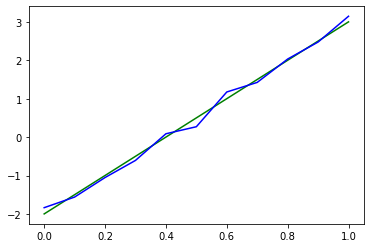

In [7]:
sns.lineplot(x = xes, y = target_ys, color = 'g')
sns.lineplot(x = xes, y = noisy_target_ys, color = 'b')

## Lin Reg SKlearn

In [8]:
from sklearn.linear_model import LinearRegression

X = xes.reshape((-1,1))
reg = LinearRegression().fit(X,target_ys)
print('Linear coef:', reg.coef_, reg.intercept_)

Linear coef: [5.] -2.000000000000001


In [9]:
reg = LinearRegression().fit(X, noisy_target_ys)
print('Linear coef:', reg.coef_, reg.intercept_)

Linear coef: [5.04257197] -2.016825086745488


<AxesSubplot:>

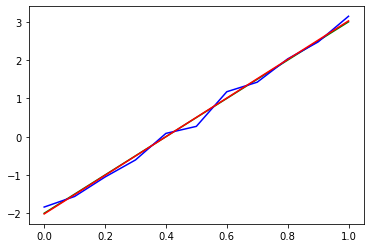

In [10]:
regression_pred = reg.predict(X)
sns.lineplot(x = xes, y= target_ys, color = 'g')
sns.lineplot(x = xes, y= noisy_target_ys, color = 'b')
sns.lineplot(x = xes, y= regression_pred, color = 'r')

In [11]:
class OwnLinearRegression:
    def __init__(self, k = 5, b = -2):
        self.k = k
        self.b = b
    def predict(self, X):
        return [x* self.k + self.b for x in X]

In [12]:
lin_reg = OwnLinearRegression()
lin_reg_pred = lin_reg.predict(np.array([xes]))
print(lin_reg_pred)
print(target_ys)

[array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])]
[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [14]:
from sklearn.linear_model import LinearRegression

X = xes.reshape((-1,1))
reg = LinearRegression().fit(X,y)
print('Linear coef:', reg.coef_, reg.intercept_)

Linear coef: [3.5] 3.500000000000001


In [16]:
class OwnLinearRegressionLS:
    def __init__(self, k = 5, b = -2):
        self.k = k
        self.b = b
    def predict(self, X):
        return [x* self.k + self.b for x in X]
    def fit(self, X,Y):
        N = len(X)
        sumX = X.sum()
        sumY = Y.sum()
        sumXSquares = np.sum(X**2)
        sumXprodY = np.sum(X * Y)
        
        self.k = (sumXprodY - sumX * sumY /N) / \
        (sumXSquares - sumX * sumX / N)
        
        self.b = np.sum(Y - self.k*X)/ N

In [26]:
lin_reg = OwnLinearRegressionLS(1,1)
print('Predict' , lin_reg.predict(np.array([2])))

lin_reg.fit(xes, noisy_target_ys)
print(lin_reg.k , lin_reg.b)
print('Predict' , lin_reg.predict(np.array([2])))



Predict [3]
5.042571974017957 -2.0168250867454875
Predict [8.068318861290425]


In [27]:
xes

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [28]:
noisy_target_ys

array([-1.83756546, -1.56117564, -1.05281718, -0.60729686,  0.08654076,
        0.26984613,  1.17448118,  1.42387931,  2.03190391,  2.47506296,
        3.14621079])